In [65]:
import sys
sys.path.append('/home/hamid/Desktop/EnsembleTools') # Add the path of the package to the system path for import

from dpet.ensemble import Ensemble
from dpet.ensemble_analysis import EnsembleAnalysis
from dpet.visualization import Visualization

ens_codes = [

    Ensemble('BA_BAdV1_linker', data_path= '/home/hamid/Downloads/Gonzalez_Foutel_2022/data/linkers/BA_BAdV1_linker/subtraj_500.xtc',top_path= '/home/hamid/Downloads/Gonzalez_Foutel_2022/data/linkers/BA_BAdV1_linker/full.pdb'),
    Ensemble('BA_BtAdV3_linker', data_path= '/home/hamid/Downloads/Gonzalez_Foutel_2022/data/linkers/BtA_BtAdV3_linker/subtraj_500.xtc',top_path= '/home/hamid/Downloads/Gonzalez_Foutel_2022/data/linkers/BtA_BtAdV3_linker/full.pdb')

    # Ensemble('PED00174e001', database='ped', chain_id='B'), 
    # Ensemble('PED00174e002', database='ped', chain_id='B'), 
    # Ensemble('PED00174e003', database='ped', chain_id='B'),
   
    # Ensemble('PED00175e001', database='ped', chain_id='A'), 
    # Ensemble('PED00175e002', database='ped', chain_id='A'), 
    # Ensemble('PED00175e003', database='ped', chain_id='A'),
    # Ensemble('Calvados',data_path='/home/hamid/Downloads/E1A_IDRLab/SIMULATION/traj.dcd',top_path='/home/hamid/Downloads/E1A_IDRLab/SIMULATION/top.pdb'),
    # Ensemble('AlphaFold3', data_path= '/home/hamid/Downloads/alphafold3/ensemble.pdb', chain_id='A' )
]
data_dir = '/home/hamid/PED_Data_analysis/nikola' 

analysis = EnsembleAnalysis(ens_codes, data_dir)
analysis.load_trajectories() 
vis = Visualization(analysis=analysis) 

Loading trajectory for BA_BAdV1_linker...
Loading trajectory for BA_BtAdV3_linker...


<Axes: title={'center': 'Radius of Gyration'}, ylabel='Radius of Gyration [nm] (Rg)'>

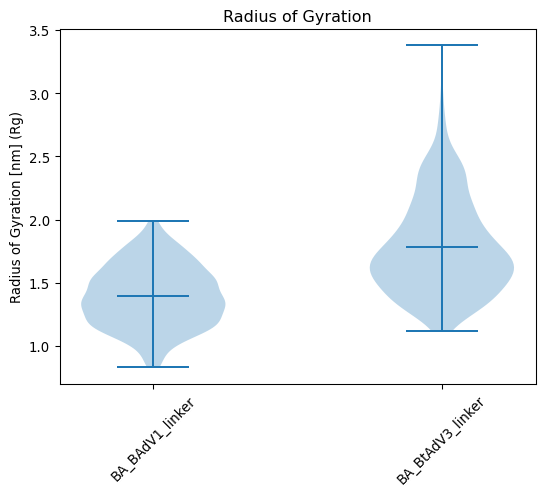

In [66]:
vis.radius_of_gyration(violin_plot=True ,means=True, median=False, bins=40)

<Axes: title={'center': 'End-to-End distances distribution'}, ylabel='End-to-End distance [nm]'>

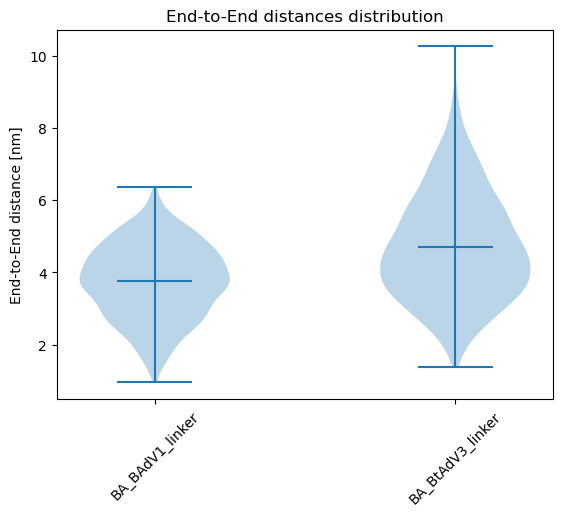

In [67]:
vis.end_to_end_distances(rg_norm=False,means=True, median=False)

<Axes: title={'center': 'SASA distribution over the ensembles'}, ylabel='SASA (nm$^2$)'>

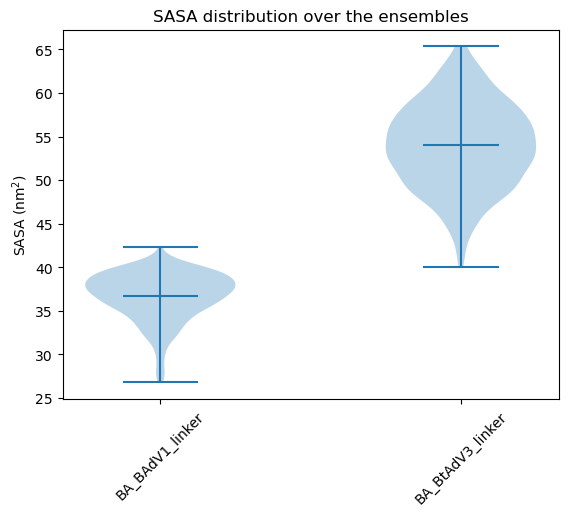

In [68]:
vis.ensemble_sasa(means=True, medians=False)

<Axes: title={'center': 'Asphericity distribution'}, ylabel='Asphericity'>

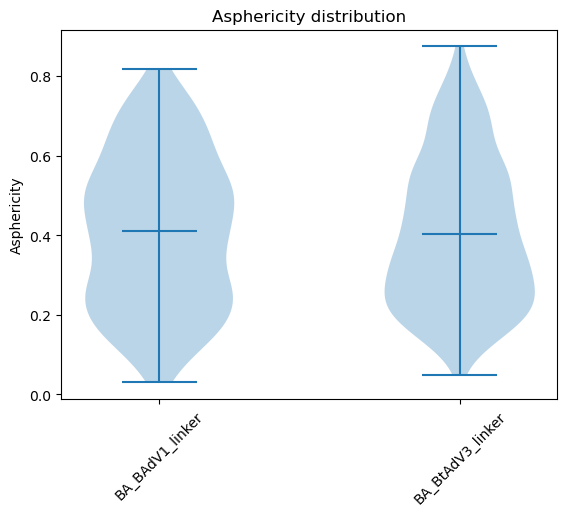

In [69]:
vis.asphericity(means=True, median=False)

Pearson coeff for PED00174e001 = 0.371
Pearson coeff for PED00174e002 = 0.591
Pearson coeff for PED00174e003 = 0.325
Pearson coeff for PED00175e001 = 0.734
Pearson coeff for PED00175e002 = 0.68
Pearson coeff for PED00175e003 = 0.729


<Axes: xlabel='Radius of Gyration (Rg) [nm]', ylabel='Asphericity'>

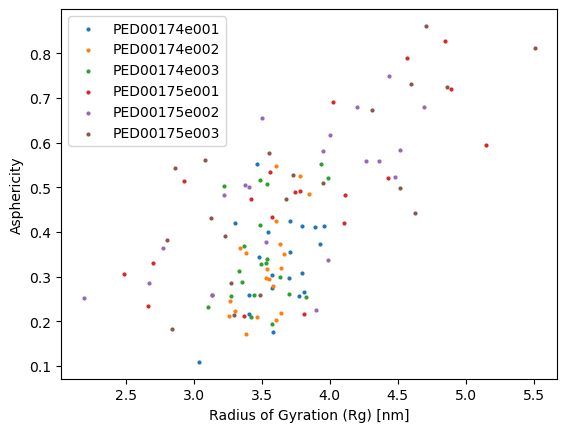

In [52]:
vis.rg_vs_asphericity()

In [53]:
v_values = analysis.get_features("flory_exponent")
print(v_values)

{'PED00174e001': 0.2504120174466823, 'PED00174e002': 0.24697789593627695, 'PED00174e003': 0.29567372494558636, 'PED00175e001': 0.5928587387116762, 'PED00175e002': 0.5961435447460068, 'PED00175e003': 0.5836072991082064}


<Axes: title={'center': 'Relative Content of H in Each Residue in the ensembles'}, xlabel='Residue Index', ylabel='Relative Content of Helix'>

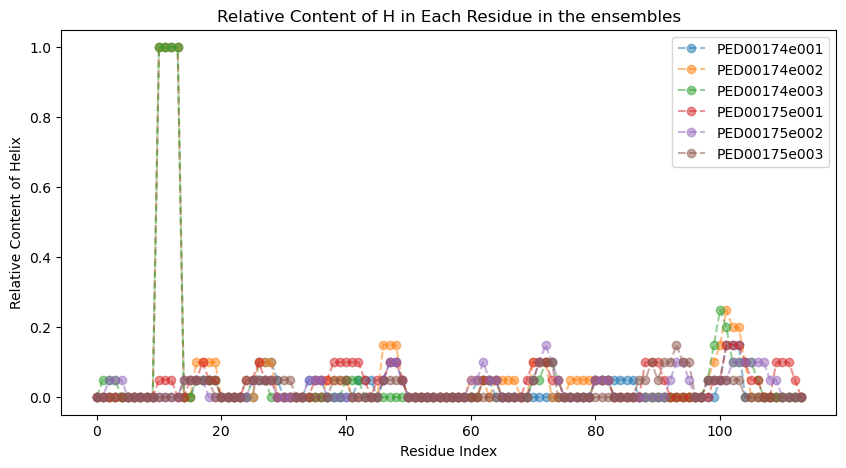

In [54]:
vis.relative_dssp_content(dssp_code='H')

<Axes: xlabel='Residue Index', ylabel='Site-specific flexibility parameter'>

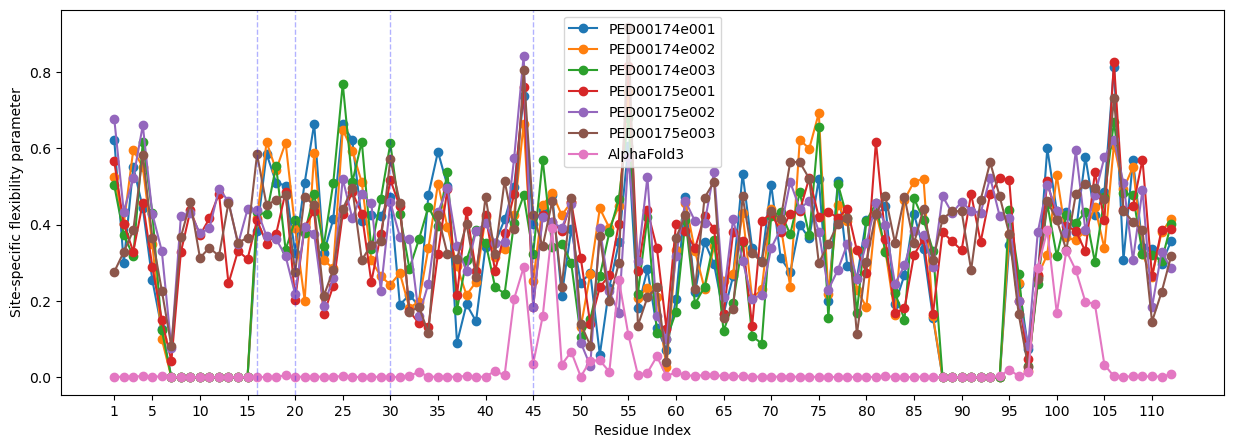

In [28]:
vis.ss_flexibility_parameter(pointer=[16,20,30,45])

array([<Axes: title={'center': 'Ramachandran Plot for cluster PED00174e001'}, xlabel='Phi (ϕ) Angle (degrees)', ylabel='Psi (ψ) Angle (degrees)'>,
       <Axes: title={'center': 'Ramachandran Plot for cluster PED00174e002'}, xlabel='Phi (ϕ) Angle (degrees)', ylabel='Psi (ψ) Angle (degrees)'>,
       <Axes: title={'center': 'Ramachandran Plot for cluster PED00174e003'}, xlabel='Phi (ϕ) Angle (degrees)', ylabel='Psi (ψ) Angle (degrees)'>,
       <Axes: title={'center': 'Ramachandran Plot for cluster PED00175e001'}, xlabel='Phi (ϕ) Angle (degrees)', ylabel='Psi (ψ) Angle (degrees)'>,
       <Axes: title={'center': 'Ramachandran Plot for cluster PED00175e002'}, xlabel='Phi (ϕ) Angle (degrees)', ylabel='Psi (ψ) Angle (degrees)'>,
       <Axes: title={'center': 'Ramachandran Plot for cluster PED00175e003'}, xlabel='Phi (ϕ) Angle (degrees)', ylabel='Psi (ψ) Angle (degrees)'>,
       <Axes: title={'center': 'Ramachandran Plot for cluster AlphaFold3'}, xlabel='Phi (ϕ) Angle (degrees)', ylabel='

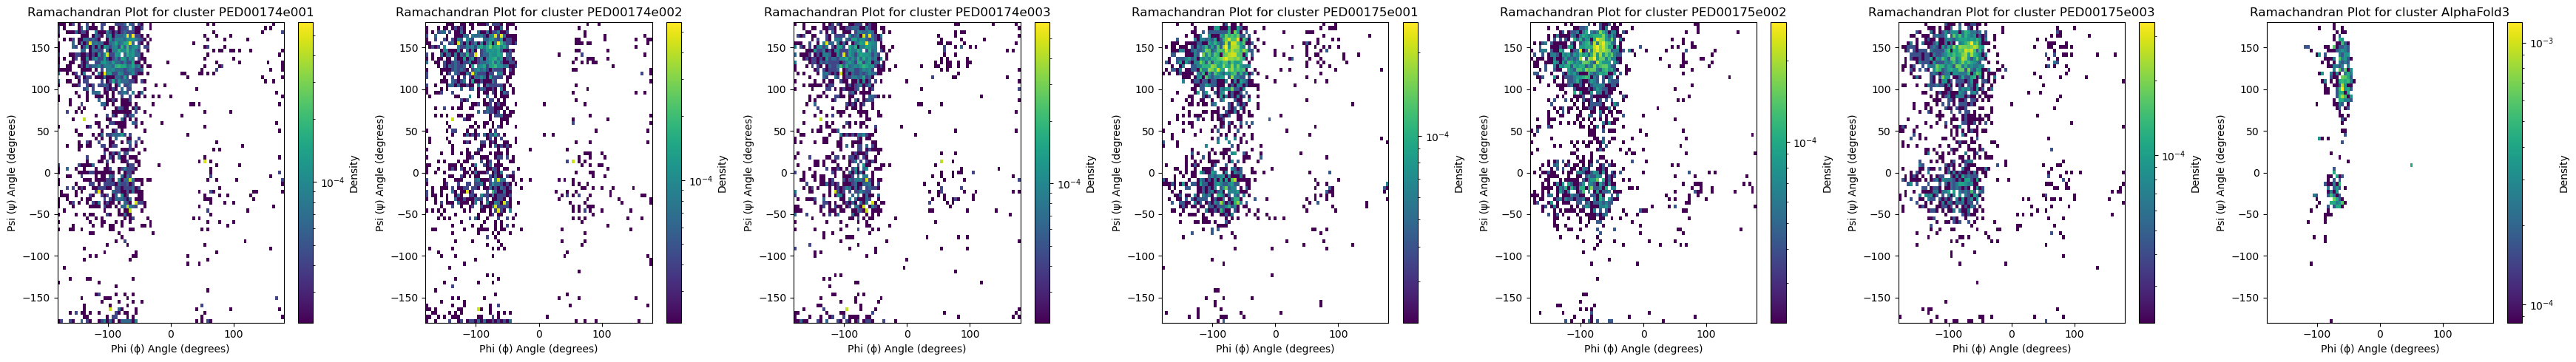

In [29]:
vis.ramachandran_plots(two_d_hist=True)

<Axes: title={'center': 'Distribution of alpha angles'}, xlabel='angle [rad]', ylabel='Density'>

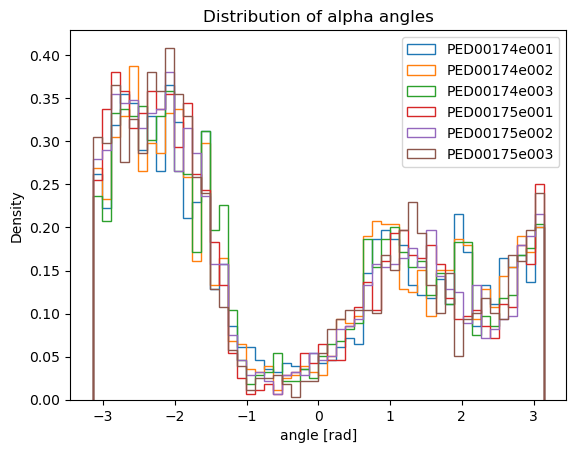

In [55]:
vis.alpha_angles()

# Scoring 'jsd' using features 'ca_dist'
- Number of bins for all comparisons: 5
- Will perform: 21 (pairs of ensembles) x 10 (iterations) = 210 (comparisons)
# Scoring 'jsd' using features 'alpha_angle'
- Number of bins for all comparisons: 5
- Will perform: 21 (pairs of ensembles) x 10 (iterations) = 210 (comparisons)


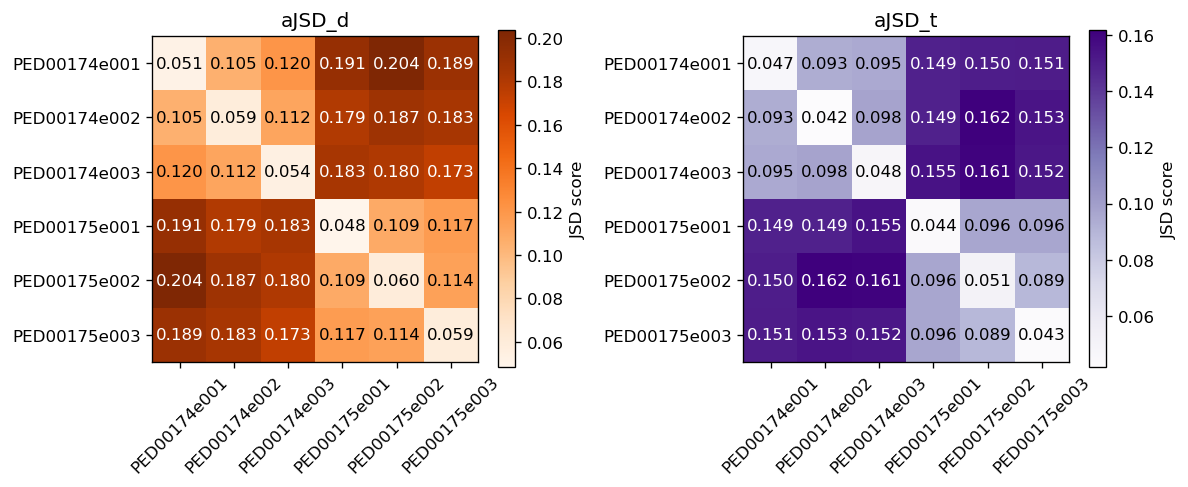

In [56]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10.0, 4), dpi=120) # making subplots to generate multiple ax figure

vis.comparison_matrix(
    score="jsd", 
    feature="ca_dist", # Comparing the ensembls using the ditribution of distances between carbon alpha atoms
    bootstrap_iters=10,
    bins="auto",
    ax=ax[0], # using ax parameter you can decide how to put each subplot on the figure
    cmap="Oranges",
    verbose=True
)

vis.comparison_matrix(
    score="jsd",
    feature="alpha_angle", # Comparing the ensembls using distribution of alpha angles
    bootstrap_iters=10,
    bins="auto",
    ax=ax[1],
    cmap="Purples",
    verbose=True
)
analysis.comparison_scores
plt.tight_layout()
plt.show()

In [31]:
analysis.extract_features(featurization='ca_dist')

Performing feature extraction for Ensemble: PED00174e001.
Transformed ensemble shape: (20, 6328)
Performing feature extraction for Ensemble: PED00174e002.
Transformed ensemble shape: (20, 6328)
Performing feature extraction for Ensemble: PED00174e003.
Transformed ensemble shape: (20, 6328)
Performing feature extraction for Ensemble: PED00175e001.
Transformed ensemble shape: (20, 6328)
Performing feature extraction for Ensemble: PED00175e002.
Transformed ensemble shape: (20, 6328)
Performing feature extraction for Ensemble: PED00175e003.
Transformed ensemble shape: (20, 6328)
Performing feature extraction for Ensemble: AlphaFold3.
Transformed ensemble shape: (5, 6328)
Feature names: ['GLY1-MET3', 'GLY1-SER4', 'GLY1-HIS5', 'GLY1-PHE6', 'GLY1-GLU7', 'GLY1-PRO8', 'GLY1-PRO9', 'GLY1-THR10', 'GLY1-LEU11', 'GLY1-HIS12', 'GLY1-GLU13', 'GLY1-LEU14', 'GLY1-TYR15', 'GLY1-ASP16', 'GLY1-LEU17', 'GLY1-ASP18', 'GLY1-VAL19', 'GLY1-THR20', 'GLY1-ALA21', 'GLY1-PRO22', 'GLY1-GLU23', 'GLY1-ASP24', 'GLY1-P

{'PED00174e001': array([[0.65865713, 0.9190648 , 1.0692353 , ..., 0.6493945 , 0.9129222 ,
         0.5496448 ],
        [0.71827805, 0.77018297, 0.8690847 , ..., 0.68488455, 0.94064254,
         0.56850314],
        [0.6749263 , 1.0531718 , 1.2099175 , ..., 0.66569704, 0.9995081 ,
         0.65426534],
        ...,
        [0.5513499 , 0.70439553, 0.54128325, ..., 0.6541459 , 0.9547836 ,
         0.6140667 ],
        [0.5234596 , 0.664149  , 0.90009934, ..., 0.6410555 , 0.8495288 ,
         0.621671  ],
        [0.72695774, 1.0825045 , 1.2575676 , ..., 0.56150883, 0.7268715 ,
         0.53883934]], dtype=float32),
 'PED00174e002': array([[0.6431754 , 0.89620423, 1.0300996 , ..., 0.66350764, 0.8753155 ,
         0.5437947 ],
        [0.5316783 , 0.63702935, 0.9758008 , ..., 0.557181  , 0.85107833,
         0.52330965],
        [0.5585637 , 0.55889547, 0.9380415 , ..., 0.5506987 , 0.7512059 ,
         0.6640575 ],
        ...,
        [0.54475284, 0.50036275, 0.58239716, ..., 0.6836231 ,

In [32]:
analysis.reduce_features(method='tsne', perplexity_vals = [10, 20,  50, 100], circular=False, range_n_clusters=range(2,10,1))

Concatenated featurized ensemble shape: (125, 6328)
tsne is running...
Best Perplexity: 20
Best Number of Clusters: 2


array([[-3.02928734e+00, -2.45006490e+00],
       [-7.59797287e+00,  5.53600597e+00],
       [-1.04615173e+01,  2.06973791e+00],
       [-4.53587484e+00, -1.36436539e+01],
       [-9.80053616e+00,  2.56078768e+00],
       [-1.05223074e+01,  8.03723335e-01],
       [-5.38379908e+00, -1.09469080e+01],
       [-1.23441477e+01, -2.49468535e-01],
       [-8.05395317e+00,  4.01429367e+00],
       [-2.10375738e+00, -8.80923748e+00],
       [-2.71192408e+00, -1.21444912e+01],
       [-5.24500418e+00,  1.65602052e+00],
       [-9.88506889e+00,  3.71007156e+00],
       [-5.12705708e+00, -1.28601599e+01],
       [-4.50077009e+00, -1.23801851e+01],
       [-6.64809275e+00, -3.14006686e+00],
       [-4.27925014e+00, -1.07122726e+01],
       [-2.10818624e+00, -1.50547057e-01],
       [-8.26329613e+00,  8.44168305e-01],
       [-3.52244139e+00, -1.05416641e+01],
       [-9.06433868e+00,  2.51337361e+00],
       [-7.75825882e+00, -3.59538460e+00],
       [-1.37685454e+00, -1.31977139e+01],
       [-3.

/home/hamid/Desktop/EnsembleTools/dpet/visualization.py:317: UserWarning: The following kwargs were not used by contour: 'label'
  ax[3].contour(xi, yi, zi.reshape(xi.shape), levels=5, alpha=0.5, label=f'Ensemble {label}', colors=[label_colors[label]])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


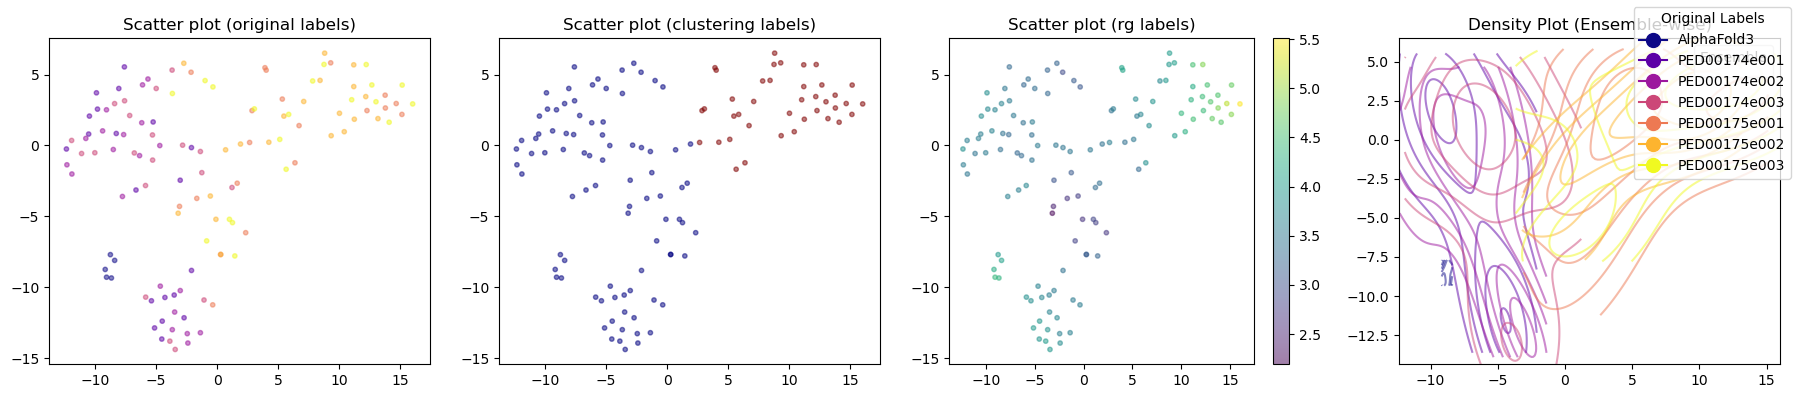

In [33]:
vis.dimensionality_reduction_scatter(color_by='rg', kde_by_ensemble=True)

In [34]:
analysis.extract_features(featurization='phi_psi')

Performing feature extraction for Ensemble: PED00174e001.
Transformed ensemble shape: (20, 226)
Performing feature extraction for Ensemble: PED00174e002.
Transformed ensemble shape: (20, 226)
Performing feature extraction for Ensemble: PED00174e003.
Transformed ensemble shape: (20, 226)
Performing feature extraction for Ensemble: PED00175e001.
Transformed ensemble shape: (20, 226)
Performing feature extraction for Ensemble: PED00175e002.
Transformed ensemble shape: (20, 226)
Performing feature extraction for Ensemble: PED00175e003.
Transformed ensemble shape: (20, 226)
Performing feature extraction for Ensemble: AlphaFold3.
Transformed ensemble shape: (5, 226)
Feature names: ['SER2-PHI', 'MET3-PHI', 'SER4-PHI', 'HIS5-PHI', 'PHE6-PHI', 'GLU7-PHI', 'PRO8-PHI', 'PRO9-PHI', 'THR10-PHI', 'LEU11-PHI', 'HIS12-PHI', 'GLU13-PHI', 'LEU14-PHI', 'TYR15-PHI', 'ASP16-PHI', 'LEU17-PHI', 'ASP18-PHI', 'VAL19-PHI', 'THR20-PHI', 'ALA21-PHI', 'PRO22-PHI', 'GLU23-PHI', 'ASP24-PHI', 'PRO25-PHI', 'ASN26-PHI'

{'PED00174e001': array([[-1.8502318 , -1.6881407 , -1.2689497 , ...,  2.2710385 ,
          2.4048312 ,  0.15362792],
        [-2.501678  , -1.5494027 , -1.0746956 , ..., -1.0491632 ,
          2.4952555 , -0.12924033],
        [-1.3296317 , -2.917717  , -1.1507714 , ...,  2.2704897 ,
          2.7091274 ,  1.8889034 ],
        ...,
        [-1.7381057 , -2.8494425 ,  1.0624111 , ...,  2.053729  ,
          2.752963  , -1.1923765 ],
        [-1.2432503 , -2.6950831 , -1.2684083 , ...,  2.3327622 ,
          2.4333174 ,  2.1464512 ],
        [-3.013943  , -2.70325   , -1.0321692 , ..., -0.31244713,
          0.55833423, -0.18315548]], dtype=float32),
 'PED00174e002': array([[-1.9011055 , -1.3596685 , -2.5924535 , ...,  2.1494284 ,
          2.5055392 , -0.51299363],
        [-1.4916775 , -1.156372  , -1.0977057 , ...,  2.8908157 ,
         -0.9817985 ,  0.01800191],
        [-2.1473002 , -2.2880993 , -1.0983266 , ...,  2.9270592 ,
         -0.66433465,  2.7475622 ],
        ...,
       

In [35]:
analysis.reduce_features(method='tsne', perplexity_vals = [10, 20,  50, 100], circular=True, range_n_clusters=range(2,10,1))

Concatenated featurized ensemble shape: (125, 226)
tsne is running...
Best Perplexity: 50
Best Number of Clusters: 2


array([[ 8.10866833e+00, -1.44228947e+00],
       [ 7.94875622e+00, -3.81264925e-01],
       [ 8.82861137e+00, -2.02088618e+00],
       [ 8.22961712e+00, -8.12434793e-01],
       [ 9.26239109e+00, -1.39326370e+00],
       [ 9.13990974e+00, -6.21816456e-01],
       [ 9.11790180e+00, -2.18502712e+00],
       [ 8.76842308e+00, -2.15451884e+00],
       [ 9.14263725e+00, -1.78723240e+00],
       [ 9.18379498e+00, -9.74497497e-01],
       [ 8.16550922e+00, -1.87324870e+00],
       [ 8.39351654e+00, -2.55636722e-01],
       [ 8.39193726e+00, -1.49173319e+00],
       [ 7.23161173e+00, -1.45488822e+00],
       [ 8.39235878e+00, -1.08512378e+00],
       [ 9.38486195e+00, -8.92601609e-01],
       [ 8.80380249e+00, -1.15112984e+00],
       [ 9.26623344e+00, -1.16159546e+00],
       [ 7.63958454e+00, -1.08699453e+00],
       [ 8.34605217e+00, -2.69899487e-01],
       [ 9.00958729e+00, -2.16177130e+00],
       [ 9.18592548e+00, -1.36890456e-01],
       [ 8.28996181e+00, -2.11928344e+00],
       [ 8.

/home/hamid/Desktop/EnsembleTools/dpet/visualization.py:317: UserWarning: The following kwargs were not used by contour: 'label'
  ax[3].contour(xi, yi, zi.reshape(xi.shape), levels=5, alpha=0.5, label=f'Ensemble {label}', colors=[label_colors[label]])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


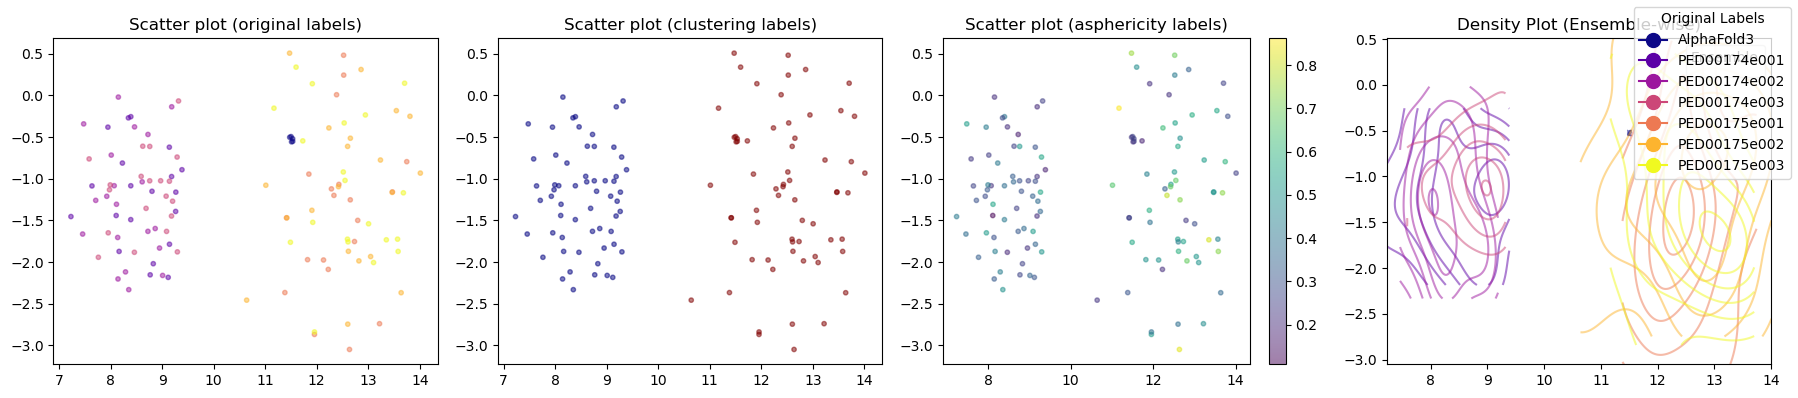

In [36]:
vis.dimensionality_reduction_scatter(color_by='asphericity', kde_by_ensemble=True)

array([<Axes: title={'center': 'Contact Probability Map: PED00174e001'}>,
       <Axes: title={'center': 'Contact Probability Map: PED00174e002'}>,
       <Axes: title={'center': 'Contact Probability Map: PED00174e003'}>,
       <Axes: title={'center': 'Contact Probability Map: PED00175e001'}>,
       <Axes: title={'center': 'Contact Probability Map: PED00175e002'}>,
       <Axes: title={'center': 'Contact Probability Map: PED00175e003'}>,
       <Axes: title={'center': 'Contact Probability Map: AlphaFold3'}>,
       <Axes: >], dtype=object)

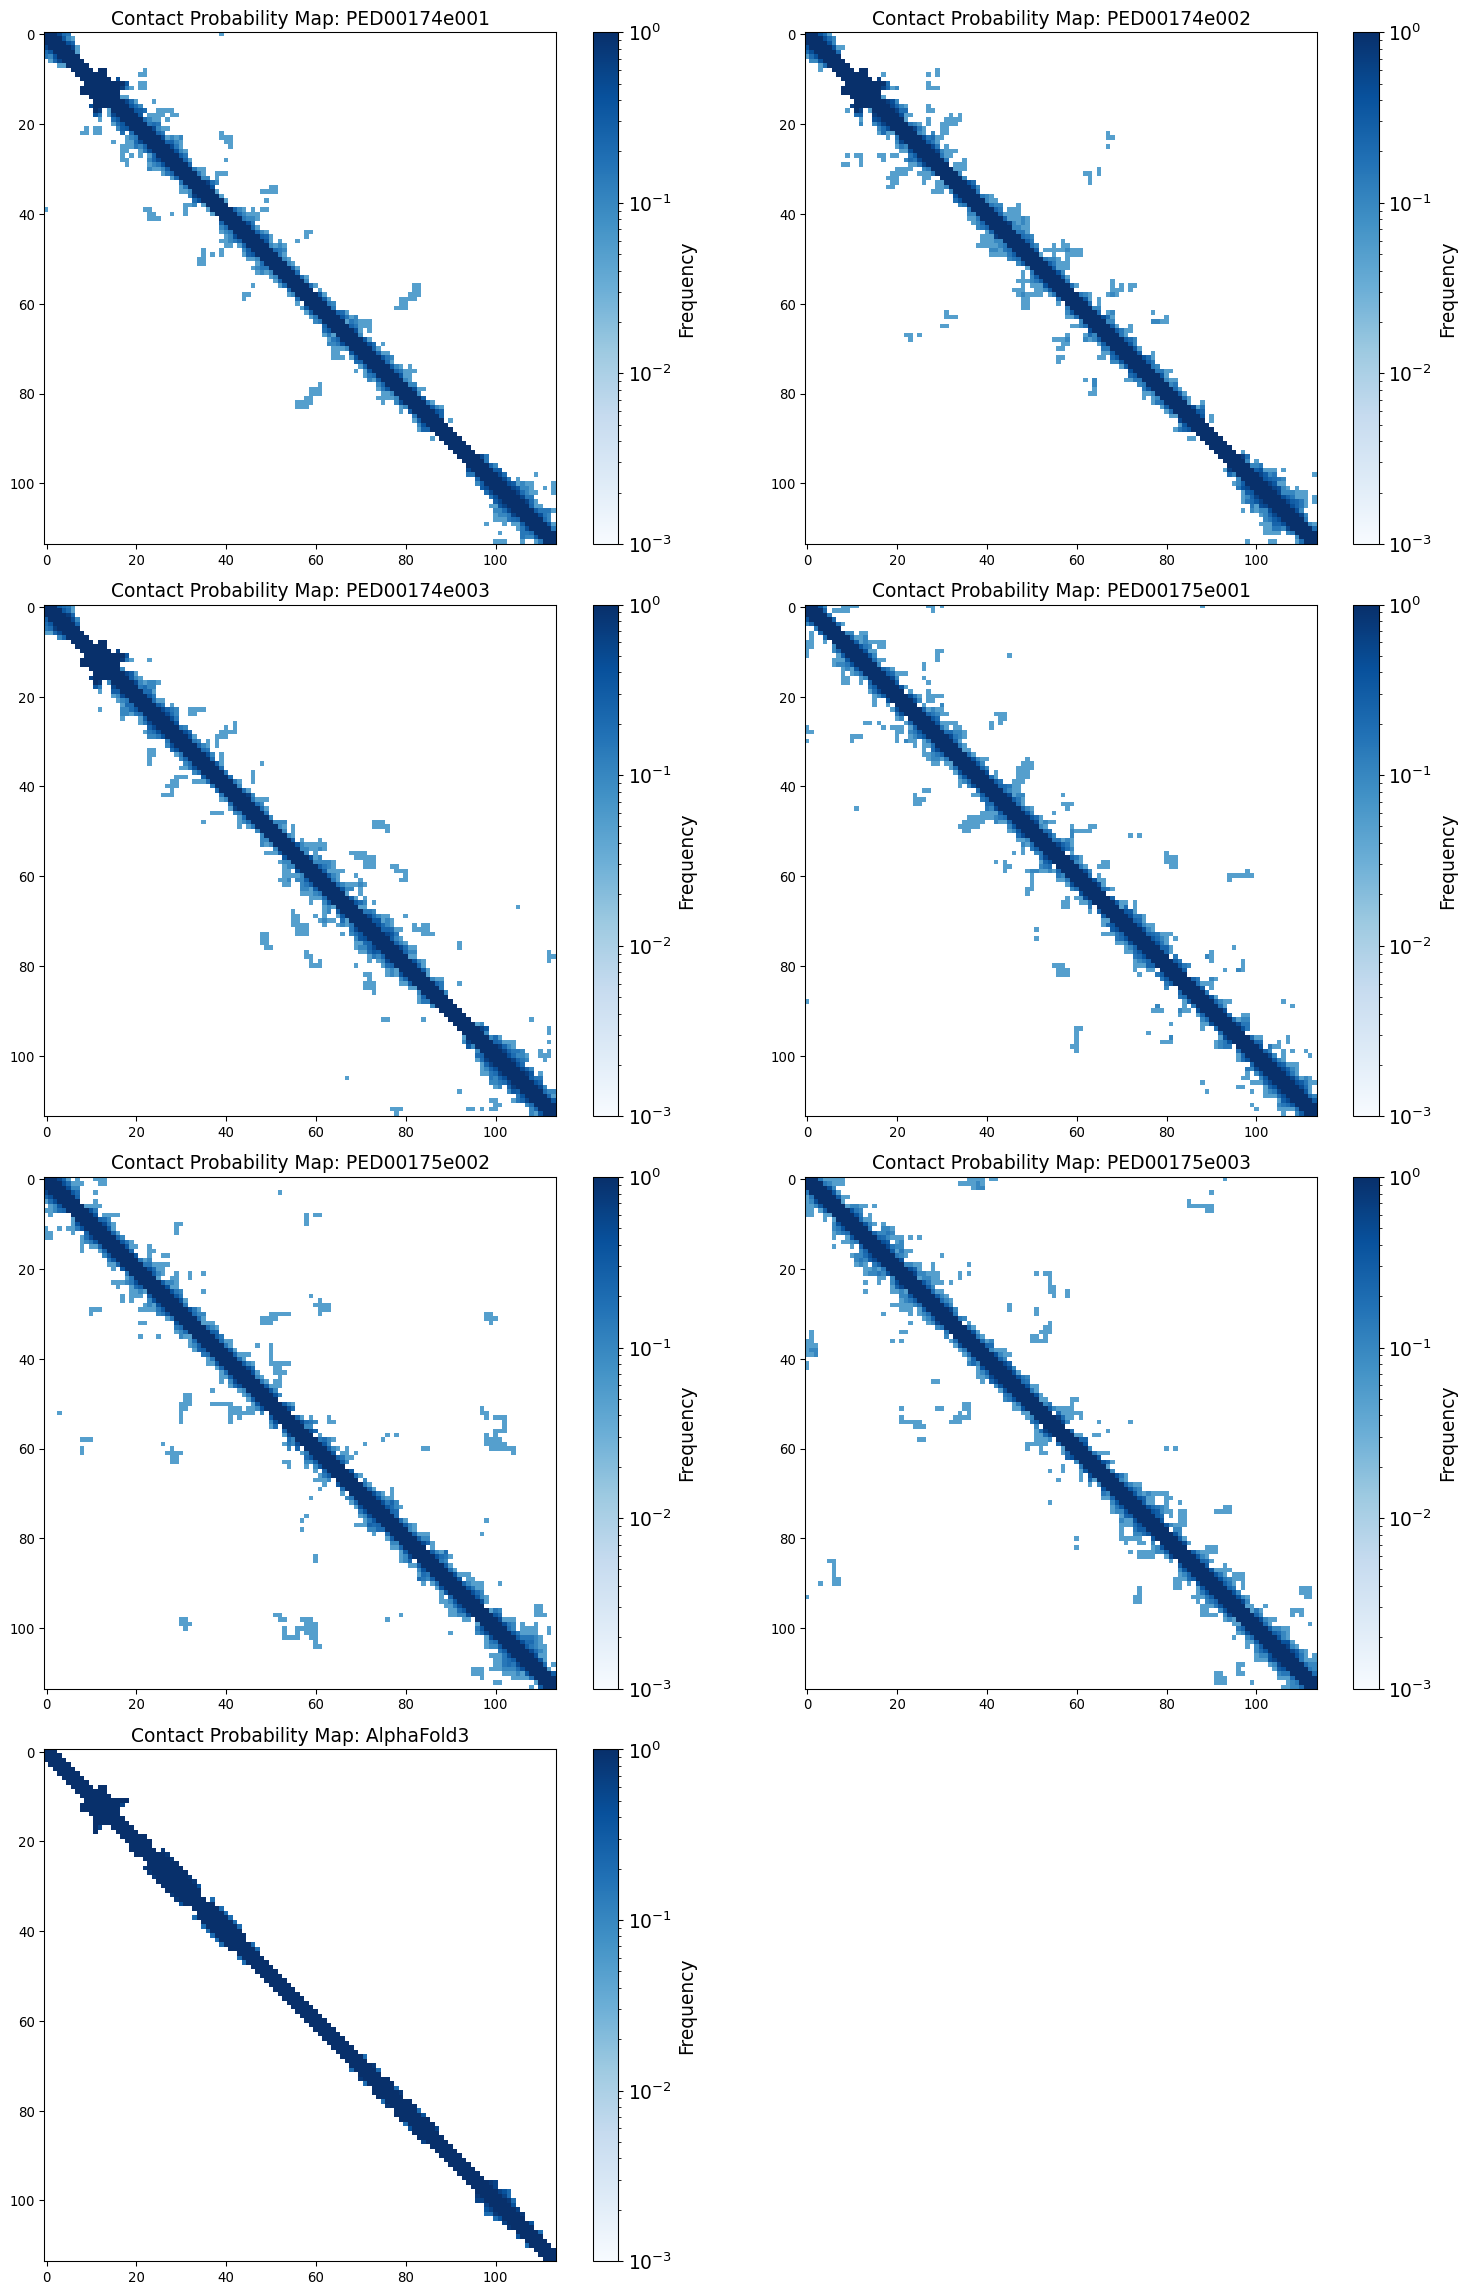

In [37]:
vis.contact_prob_maps()